# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - I am part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates, on a state of my choice. 

##  Summary

I will be taking a look at aggregate SAT and ACT scores and participation rates from each state in the United States. I'll seek to identify trends in the data, and combine my  data analysis with outside research to identify likely factors influencing participation rates and scores in various states.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math


## 2017 Data Import and Cleaning

#### SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Data imports:

sat_2017 = pd.read_csv('data/sat_2017.csv')


act_2017 = pd.read_csv('data/act_2017.csv')

####  Display Data

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


Data shows the average act and sat scores per subject and composite for each state, 
along with the participation rates and the national averages. 

## Data Cleaning

In [5]:
act_2017.shape

(52, 7)

In [6]:
#missing values

act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

comparing any questionable values to the sources of my data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
act_2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [8]:
sat_2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

The minimum possible value for the SAT is a 200, however as you can see above the minimum score was a 52. 
The ACT's lowest possible value was a 4, one column lists a value of 2.3. This is clearly an input error and these two values will be replaced with data found on the SAT and ACT websites. 


In [9]:
#Isolating columns that have scores below possible minimum 

sat_2017[sat_2017['Math'] < 200] 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [10]:
#Modifying value to avg found online
#https://blog.prepscholar.com/average-sat-scores-by-state-most-recent. 

sat_2017['Math'].replace({200: 507}, inplace=True)

sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### Checking my data types 

In [11]:

print(sat_2017.info())


print(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-nu

participation rates are an object type rather than a numeric or float type. 


#### Fixing Incorrect Data Types


In [12]:
act_2017['Participation'] = act_2017['Participation'].str.rstrip('%').astype('float')

sat_2017['Participation'] = sat_2017['Participation'].str.rstrip('%').astype('float')


act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [13]:
#getting rid of extra values 

act_2017['Composite']

act_2017['Composite'].replace({'20.2x': '20.2'}, inplace=True)

In [14]:
#convert composite to int or float 

act_2017['Composite'] = act_2017['Composite'].astype('float')

act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [15]:
#np.where(sat_2017['State'].isin(sat_2018['State']), 'nan', sat_2017.index)

In [16]:
#replacing low score in science 2017 act by online data found on ACT website 

act_2017['Science'].replace({2.3: 23.8}, inplace=True)

#### Renaming Columns
Changing the names of the columns to more expressive names so that I can tell the difference between the SAT columns and the ACT columns. **I will be combining these data with some of the data from 2018, and so I will have to name columns in an appropriate way**.


In [17]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [18]:
#Renaming columns
act_2017.rename(columns= {
    'state_2017_act' :'state',
    'Participation' : 'participation_2017_act',
    'English': 'english_2017_act',
    'Math': 'math_2017_act',
    'Reading': 'reading_2017_act',
    'Science': 'science_2017_act',
    'Composite': 'composite_2017_act'
}, inplace = True)




sat_2017.rename(columns= {
    'state_2017_sat' : 'state',
    'Participation' : 'participation_2017_sat',
    'Evidence-Based Reading and Writing': 'writing_reading_2017_sat',
    'Math': 'math_2017_sat',
    'Total': 'total_2017_sat'
}, inplace = True)


sat_2017.head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


####  Drop unnecessary rows


In [19]:
#drop national row in act data set 

act_2017.drop([0])

,State,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### Merge Dataframes

Joining the 2017 ACT and SAT dataframes using the state in each dataframe as the key.

In [20]:
#Merging

merged_2017 = pd.merge(left=sat_2017, right=act_2017, left_on='State', right_on='State')

merged_2017.head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### Save cleaned, merged dataframe


In [21]:
#Saving

df = pd.DataFrame(merged_2017)
#save the data to a csv_file.
df.to_csv('combined_2017.csv')


## 2018 Data Import and Cleaning

I will read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. I will repeat the same processes to clean the 2018 data here as I did for previous data.

In [22]:
#imports
act_2018 = pd.read_csv('data/act_2018.csv')

sat_2018 = pd.read_csv('data/sat_2018.csv')

In [23]:
#renaming columns
act_2018.rename(columns= {
    'Participation' : 'participation_2018_act',
    'Composite': 'composite_2018_act'
}, inplace = True)




sat_2018.rename(columns= {
    'Participation' : 'participation_2018_sat',
    'Evidence-Based Reading and Writing': 'writing_reading_2018_sat',
    'Math': 'math_2018_sat',
    'Total': 'total_2018_sat'
}, inplace = True)



act_2018.head()

,State,participation_2018_act,composite_2018_act
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [24]:
#Fixing Capitalization errors 

act_2018['State'].replace({'District of columbia': 'District of Columbia'}, inplace=True)

act_2018.head(9)

,State,participation_2018_act,composite_2018_act
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6


In [25]:
act_2018 = act_2018.drop([19])

In [26]:
#Converting to float ACT

sat_2018['participation_2018_sat'] = sat_2018['participation_2018_sat'].str.rstrip('%').astype('float')

sat_2018.head() 

,State,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [27]:
#converting to float SAT
act_2018['participation_2018_act'] = act_2018['participation_2018_act'].str.rstrip('%').astype('float')

act_2018.head()

,State,participation_2018_act,composite_2018_act
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [28]:
#merging dataframes

merged_2018 = pd.merge(left=sat_2018, right=act_2018, left_on='State', right_on='State')

In [29]:
#checking new data frame
merged_2018

,State,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
0,Alabama,6.0,595,571,1166,100.0,19.1
1,Alaska,43.0,562,544,1106,33.0,20.8
2,Arizona,29.0,577,572,1149,66.0,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4
4,California,60.0,540,536,1076,27.0,22.7
5,Colorado,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,505,492,998,17.0,23.8
8,District of Columbia,92.0,497,480,977,32.0,23.6
9,Florida,56.0,550,549,1099,66.0,19.9


#### Combining my 2017 and 2018 data into a single dataframe


In [30]:
#creating final df 
final = pd.merge(left = merged_2017, right = merged_2018, left_on='State', right_on = 'State')

final.head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


## Exploratory Data Analysis


### Summary Statistics

In [31]:
final.describe()

,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.462745,21.519608,45.745098,563.686275,556.235294,1120.019608,61.725490,21.496078
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,1.753392,2.020695,37.314256,47.502627,47.772623,94.155083,34.037085,2.111583
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Writing a function to calculate standard deviation using the formula above

In [32]:
#Std Dev Function

def mean(data):
    return float(sum(data) / len(data))

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def stddev(data):
    return (variance(data)) ** 0.5

stddev(final['writing_reading_2018_sat'])

47.03460978357609

In [33]:
#Applying std dev function to numerical columns in df 

final_no_state = final.drop(columns=['State'])
sd = {key: stddev(final_no_state[key]) for key, value in final_no_state.items()}

sd

{'participation_2017_sat': 34.92907076664508,
 'writing_reading_2017_sat': 45.21697020437866,
 'math_2017_sat': 84.07255521608297,
 'total_2017_sat': 91.58351056778743,
 'participation_2017_act': 31.824175751231806,
 'english_2017_act': 2.3304876369363363,
 'math_2017_act': 1.9624620273436781,
 'reading_2017_act': 2.0469029314842646,
 'science_2017_act': 1.7361170088327353,
 'composite_2017_act': 2.000786081581989,
 'participation_2018_sat': 36.946619223539415,
 'writing_reading_2018_sat': 47.03460978357609,
 'math_2018_sat': 47.30194550378352,
 'total_2018_sat': 93.22742384464433,
 'participation_2018_act': 33.70173582041031,
 'composite_2018_act': 2.090779082141178}

My calculated standard deviation is slightly different than the describe function. My calculated standard deviation is the same as numpy calculate std dev. 

In [34]:
final.describe()

,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.462745,21.519608,45.745098,563.686275,556.235294,1120.019608,61.725490,21.496078
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,1.753392,2.020695,37.314256,47.502627,47.772623,94.155083,34.037085,2.111583
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


In [35]:
np.std(final)

participation_2017_sat      34.929071
writing_reading_2017_sat    45.216970
math_2017_sat               84.072555
total_2017_sat              91.583511
participation_2017_act      31.824176
english_2017_act             2.330488
math_2017_act                1.962462
reading_2017_act             2.046903
science_2017_act             1.736117
composite_2017_act           2.000786
participation_2018_sat      36.946619
writing_reading_2018_sat    47.034610
math_2018_sat               47.301946
total_2018_sat              93.227424
participation_2018_act      33.701736
composite_2018_act           2.090779
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [36]:
#highest 2017 SAT Participation 

final.sort_values('participation_2017_sat', ascending = False).head()

#or

final[(final['participation_2017_sat']) == 100.0].head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2


In [37]:
#lowest 2017 SAT Participation 

final.sort_values('participation_2017_sat', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4


In [38]:
#lowest 2018 SAT Participation 

final.sort_values('participation_2018_sat', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633,625,1257,100.0,20.0
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622,618,1240,77.0,21.9
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,623,1252,100.0,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5


In [39]:
#highest 2018 SAT Participation 

final.sort_values('participation_2018_sat', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3


In [40]:
#HIGHEST ACT Participation 2017 


final.sort_values('participation_2017_act', ascending = False).head(20)

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,19.4,8.0,541,521,1062,100.0,19.3
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1098,100.0,19.1
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
26,Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,20.3,10.0,606,592,1198,100.0,20.0


In [41]:
#Highest ACT participation 2018 

final.sort_values('participation_2018_act', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6


In [42]:
#Lowest ACT participation 2018

final.sort_values('participation_2018_act', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5


In [43]:
#Lowest ACT Participation 2017

final.sort_values('participation_2017_act', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5


Which states have the highest and lowest mean total/composite scores for the:
2017 SAT?
2018 SAT?
2017 ACT?
2018 ACT?

In [44]:
#highest composite ACT 2017

final.sort_values('composite_2017_act', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


In [45]:
#lowest composte ACT 2017

final.sort_values('composite_2017_act', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1098,100.0,19.1


In [46]:
#lowest total sat 2017

final.sort_values('total_2017_sat', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0


In [47]:
#highest total sat 2017

final.sort_values('total_2017_sat', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1265,71.0,21.6


In [48]:
#highest total sat 2018

final.sort_values('total_2018_sat', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1265,71.0,21.6


In [49]:
#lowest total sat 2018

final.sort_values('total_2018_sat', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.4,28.0,513,486,999,65.0,20.3
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4


In [50]:
#lowest composte ACT 2018

final.sort_values('composite_2018_act', ascending = True).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1


In [51]:
#highest composte ACT 2018

final.sort_values('composite_2018_act', ascending = False).head()

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,24.2,79.0,534,534,1068,27.0,24.5
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2


# 2019 DATA, import, cleaning, merging. 

In [52]:
sat_2019 = pd.read_csv('data/sat_2019.csv', encoding = "ISO-8859-1")


act_2019 = pd.read_csv('data/act_2019.csv')


In [53]:
act_2019['Participation'] = act_2019['Participation'].str.rstrip('%').astype('float')

In [54]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1
2,Arizona,73.0,19.0
3,Arkansas,100.0,19.3
4,California,23.0,22.6


In [55]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [56]:
act_2019.rename(columns= {
    'Participation' : 'participation_2019_act',
    'Composite': 'composite_2019_act'
}, inplace = True)




sat_2019.rename(columns= {
    'Participation Rate' : 'participation_2019_sat',
    'EBRW': 'writing_reading_2019_sat',
    'Math': 'math_2019_sat',
    'Total': 'total_2019_sat'
}, inplace = True)




In [57]:
sat_2019['participation_2019_sat'].replace({'Ñ': np.NaN}, inplace=True)

In [58]:
sat_2019['participation_2019_sat'] = sat_2019['participation_2019_sat'].str.rstrip('%').astype('float')

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [59]:
import seaborn as sns; sns.set_theme()

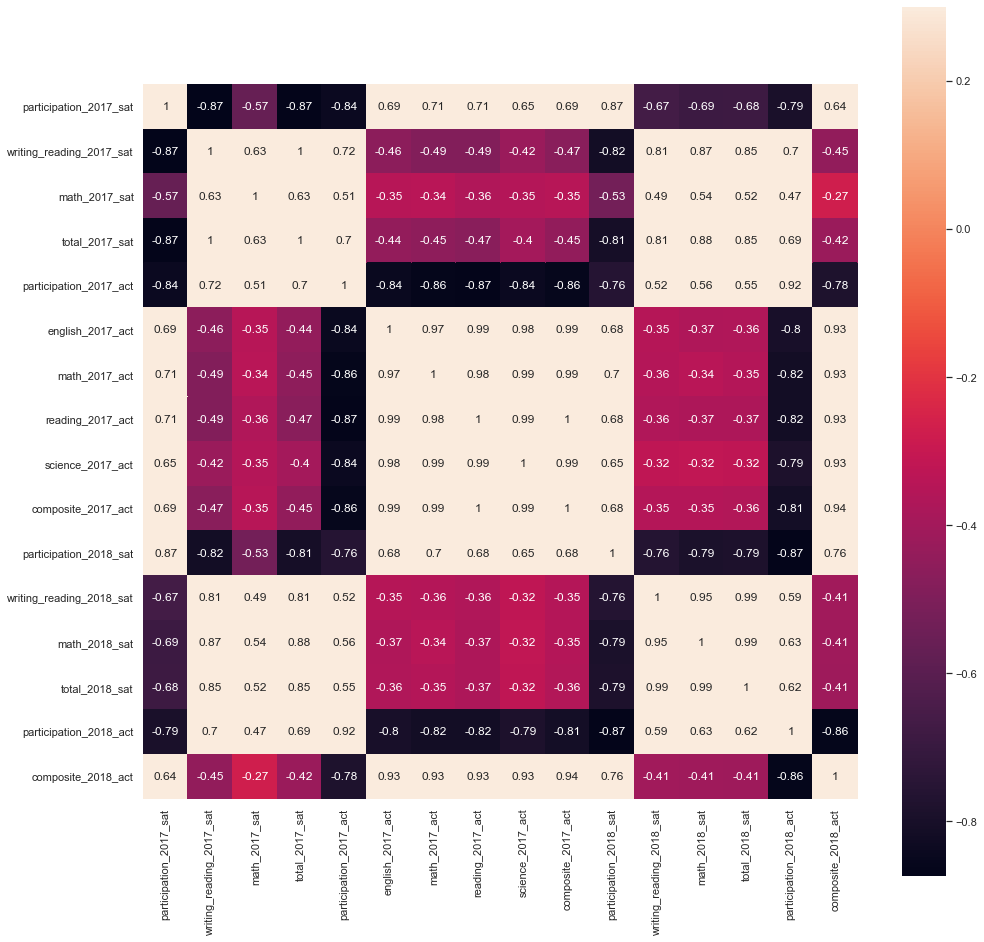

In [60]:
correlation_merged = merged_2018.corr()

plt.figure(figsize=(16,16))

# Generate 10 variables of 200 random observations.
corr = final.corr()

mask = np.zeros_like(corr)


# Plot our correlation heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)


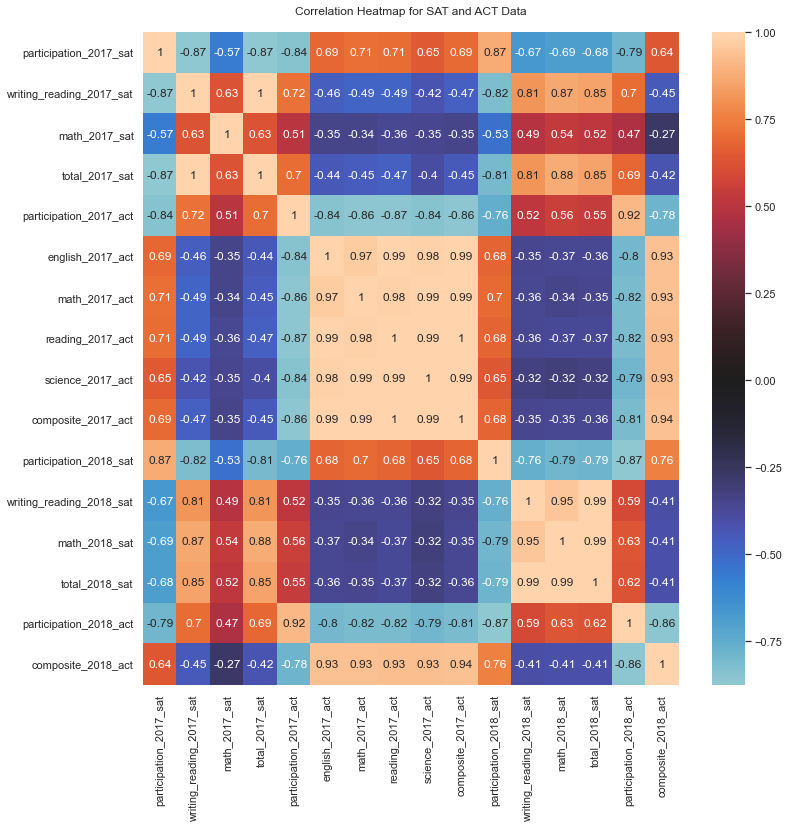

In [61]:
#heatmap 2

#make titles and figures bigger 
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(final.corr(),annot=True, center=0)
ax.set_title('Correlation Heatmap for SAT and ACT Data\n');

#### Define a custom function to subplot histograms


In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        list_of_titles = column
        ax[i].hist(dataframe[column], bins = 5)
        ax[i].set(title = (list_of_titles[i]),xlabel = list_of_xlabels[i])
        plt.title = list_of_titles[i]

plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

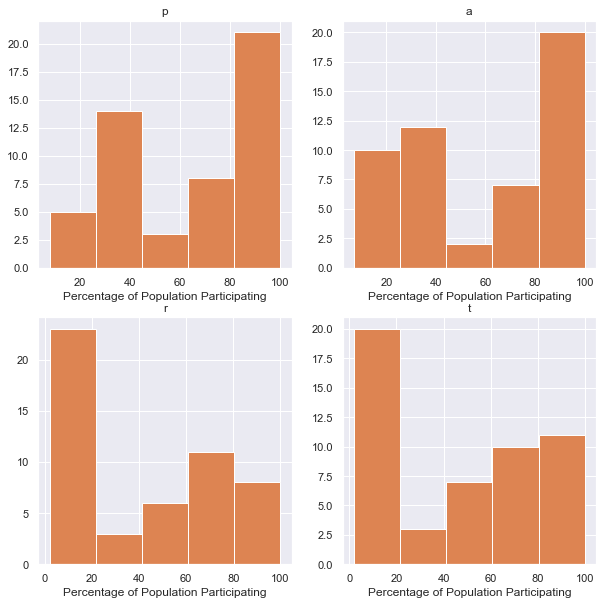

In [63]:
#Participation scores 

subplot_histograms(final,['participation_2017_act','participation_2018_act', 'participation_2017_sat','participation_2018_sat'],
                   ['ACT 2017 Participation','ACT 2018 Participation', 'SAT 2017 Participation', 'SAT 2018 Participation'],
                   ['Percentage of Population Participating', 'Percentage of Population Participating', 'Percentage of Population Participating', 'Percentage of Population Participating'])

The ACT(top two graphs) has higher participation than the SAT(two lower graphs). About 20% of the of the distribution for the SAT participation lies between 0-20% participation.

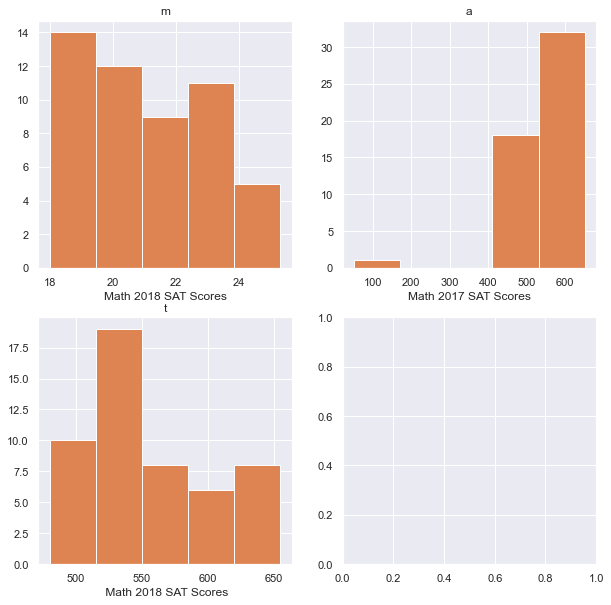

In [64]:
#Math Scores

subplot_histograms(final,['math_2017_act', 'math_2017_sat', 'math_2018_sat'],
                   ['ACT 2017 Math', 'SAT 2017 Math', 'SAT 2018 Math'],
                   ['Math 2018 SAT Scores', 'Math 2017 SAT Scores', ' Math 2018 SAT Scores'])

In [65]:
final.columns

Index(['State', 'participation_2017_sat', 'writing_reading_2017_sat',
       'math_2017_sat', 'total_2017_sat', 'participation_2017_act',
       'english_2017_act', 'math_2017_act', 'reading_2017_act',
       'science_2017_act', 'composite_2017_act', 'participation_2018_sat',
       'writing_reading_2018_sat', 'math_2018_sat', 'total_2018_sat',
       'participation_2018_act', 'composite_2018_act'],
      dtype='object')

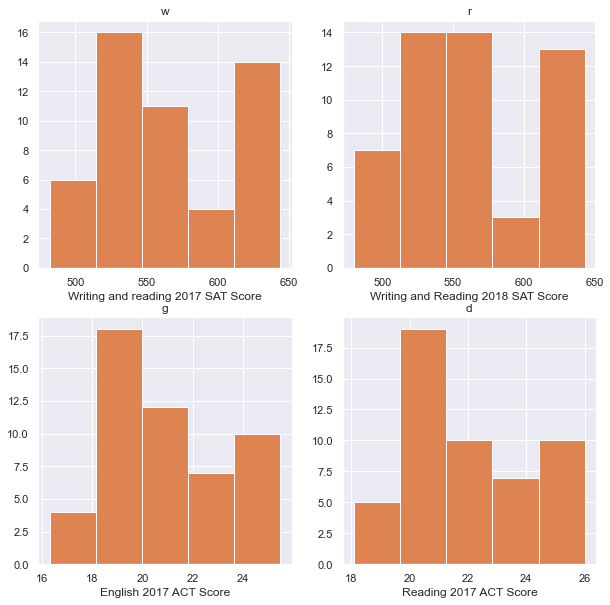

In [66]:
#SAT and ACT Reading and Writing 

subplot_histograms(final,['writing_reading_2017_sat','writing_reading_2018_sat', 'english_2017_act','reading_2017_act'],
                   ['2017 Writing + Reading SAT','2017 Writing + Reading SAT', ' 2017 English ACT', '2017 Reading Act'],
                   ['Writing and reading 2017 SAT Score', 'Writing and Reading 2018 SAT Score', 'English 2017 ACT Score', 'Reading 2017 ACT Score'])

English and reading scores have similar distributions across years, and across ACT and SAT tests

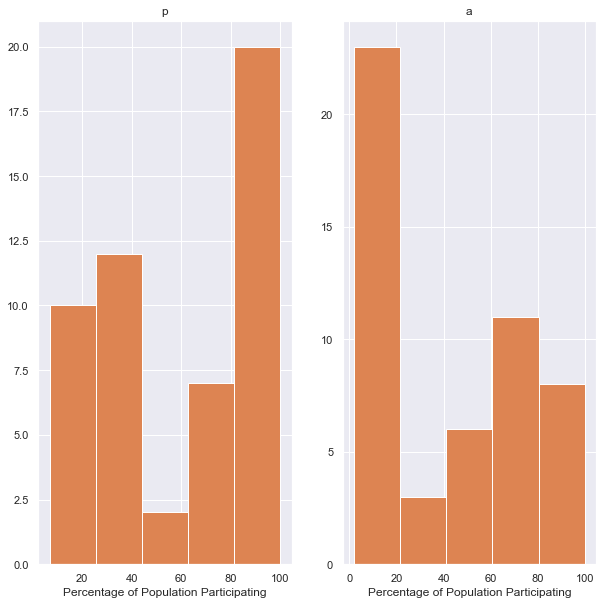

In [67]:
# Code
subplot_histograms(final, ['participation_2018_act', 'participation_2017_sat'],
                   ['SAT 2018 Participation', 'SAT 2017 Participation'],
                   ['Percentage of Population Participating', 'Percentage of Population Participating'])


In [68]:
final.columns

Index(['State', 'participation_2017_sat', 'writing_reading_2017_sat',
       'math_2017_sat', 'total_2017_sat', 'participation_2017_act',
       'english_2017_act', 'math_2017_act', 'reading_2017_act',
       'science_2017_act', 'composite_2017_act', 'participation_2018_sat',
       'writing_reading_2018_sat', 'math_2018_sat', 'total_2018_sat',
       'participation_2018_act', 'composite_2018_act'],
      dtype='object')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [69]:
final.columns

Index(['State', 'participation_2017_sat', 'writing_reading_2017_sat',
       'math_2017_sat', 'total_2017_sat', 'participation_2017_act',
       'english_2017_act', 'math_2017_act', 'reading_2017_act',
       'science_2017_act', 'composite_2017_act', 'participation_2018_sat',
       'writing_reading_2018_sat', 'math_2018_sat', 'total_2018_sat',
       'participation_2018_act', 'composite_2018_act'],
      dtype='object')

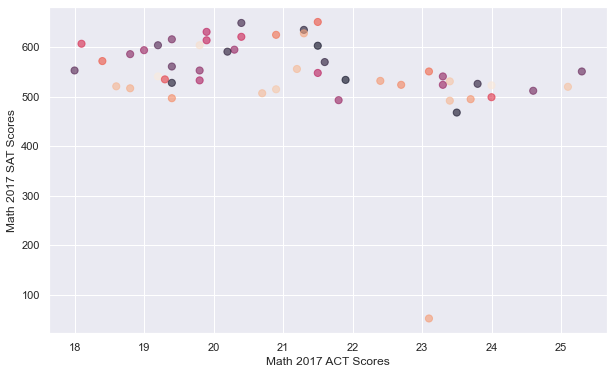

In [71]:
# Code
plt.figure(figsize = (10,6))
N = len(final['math_2017_act'])
x = final['math_2017_act']
y = final['math_2017_sat']
plt.xlabel('Math 2017 ACT Scores')
plt.ylabel('Math 2017 SAT Scores')
#plt.title('Average 2017 Math ACT and SAT scores by State')
colors = np.random.rand(N)
area = N  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.show()


There is no correlation between math 2017 ACT scores and math 2017 SAT Scores

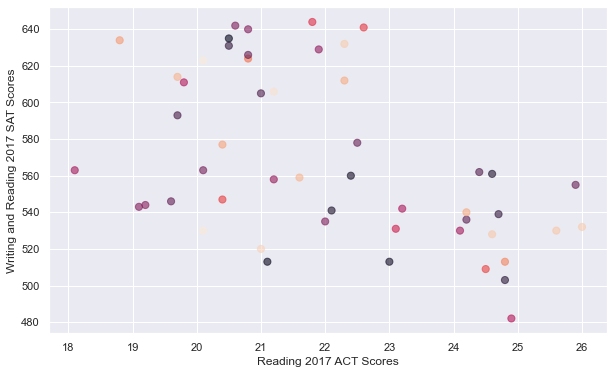

In [75]:
plt.figure(figsize = (10,6))
N = len(final['math_2017_act'])
x = final['reading_2017_act']
y = final['writing_reading_2017_sat']
plt.xlabel('Reading 2017 ACT Scores')
plt.ylabel('Writing and Reading 2017 SAT Scores')

colors = np.random.rand(N)
area = N  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.6)

#plt.title('Average 2017 Reading and Writing ACT and SAT scores by State')
plt.show()



There is no correlation between writing and reading 2017 SAT scores and reading 2017 ACT SCores

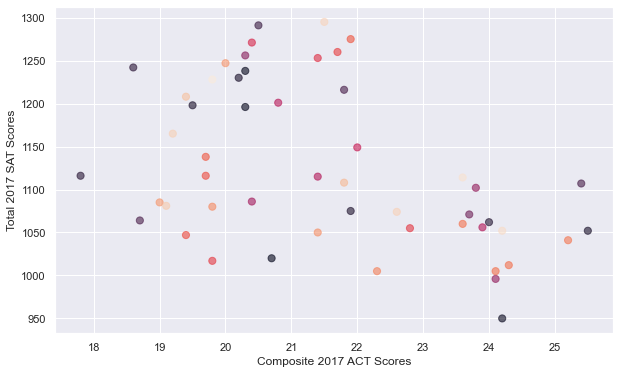

In [76]:
plt.figure(figsize = (10,6))
N = len(final['math_2017_act'])
x = final['composite_2017_act']
y = final['total_2017_sat']
plt.xlabel('Composite 2017 ACT Scores')
plt.ylabel('Total 2017 SAT Scores')

#plt.title('Average 2017 Composite ACT and SAT scores by State')

colors = np.random.rand(N)
area = N  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.show()



There is no correlation between 2017 ACT scores and 2017 SAT Scores

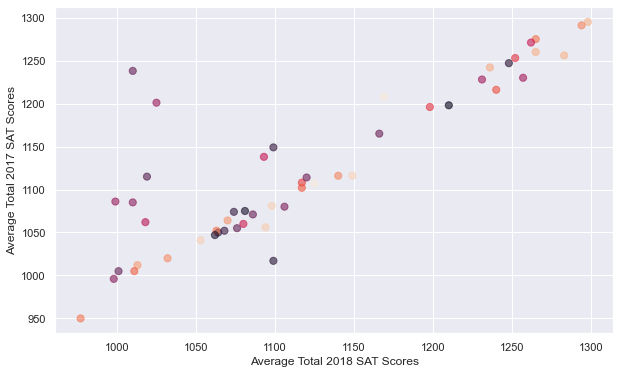

In [78]:
#Total scores for SAT 2017 vs. 2018

plt.figure(figsize = (10,6))
N = len(final['math_2017_act'])
x = final['total_2018_sat']
y = final['total_2017_sat']
plt.xlabel('Average Total 2018 SAT Scores')
plt.ylabel('Average Total 2017 SAT Scores')
#plt.title('Average 2017 and 2018 SAT scores by State')
colors = np.random.rand(N)
area = N  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.show()


There is a positive correlation between 2017 and 2018 total SAT Scores

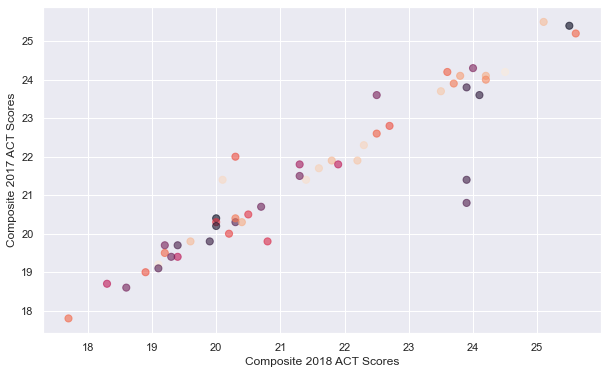

In [79]:
#Composite scores for ACT 2017 vs. 2018


plt.figure(figsize = (10,6))
N = len(final['math_2017_act'])
x = final['composite_2018_act']
y = final['composite_2017_act']
plt.xlabel('Composite 2018 ACT Scores')
plt.ylabel('Composite 2017 ACT Scores')
#plt.title('Average Composite 2017 and 2018 ACT scores by State')
colors = np.random.rand(N)
area = N  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.show()

There is a strong positive correlation between 2017 and 2018 composite ACT scores

# Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

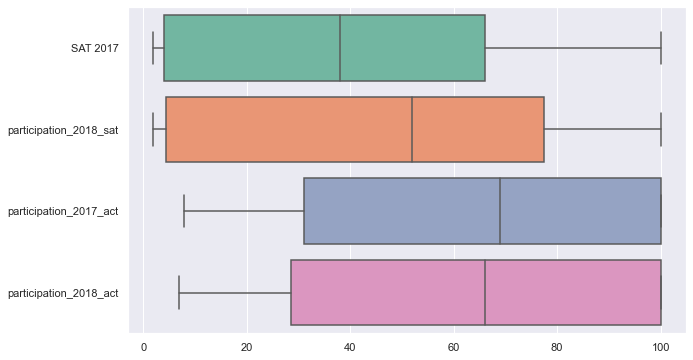

In [81]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
participation_rates = final.loc[:,['participation_2017_sat','participation_2018_sat','participation_2017_act','participation_2018_act']]
participation_rates = participation_rates.rename(columns={
    'participation_2017_sat':'SAT 2017',
    'participation_2018_SAT':'SAT 2018',
    'participation_2017_ACT':'ACT 2017',
    'participation_2018_ACT':'ACT 2018',
})
plt.figure(figsize=(10,6)),
#plt.title(participation_rates),
sns.boxplot(data=participation_rates,orient='h',palette='Set2');

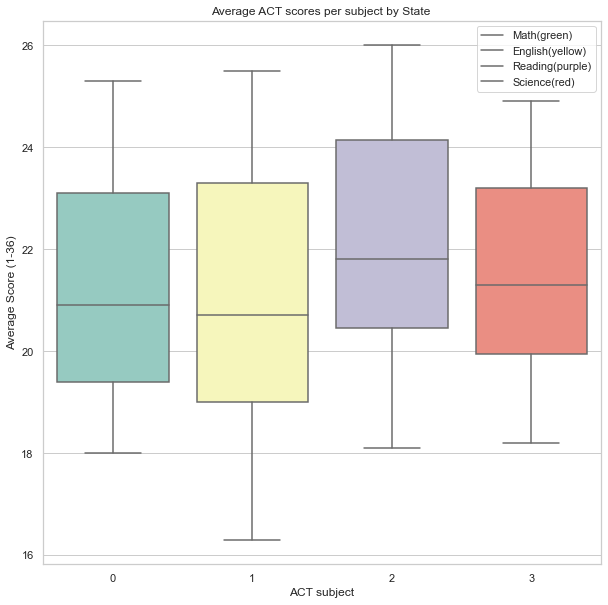

In [83]:
#For each numeric variable in the dataframe create a boxplot using Seaborn
sns.set_theme(style="whitegrid")
act = [final['math_2017_act'], final['english_2017_act'], final['reading_2017_act'], final['science_2017_act']]

y = range(1,30)

legend = ['Math', 'English', 'Reading', 'Science']
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = act, orient = 'v', palette="Set3")
ax.set_title('Average ACT scores per subject by State ')
ax.set_ylabel('Average Score (1-36)')
ax.set_xlabel('ACT subject')
handles, _ = ax.get_legend_handles_labels()
ax.legend(['Math(green)', 'English(yellow)', 'Reading(purple)', 'Science(red)'])

In [84]:
final.columns

Index(['State', 'participation_2017_sat', 'writing_reading_2017_sat',
       'math_2017_sat', 'total_2017_sat', 'participation_2017_act',
       'english_2017_act', 'math_2017_act', 'reading_2017_act',
       'science_2017_act', 'composite_2017_act', 'participation_2018_sat',
       'writing_reading_2018_sat', 'math_2018_sat', 'total_2018_sat',
       'participation_2018_act', 'composite_2018_act'],
      dtype='object')

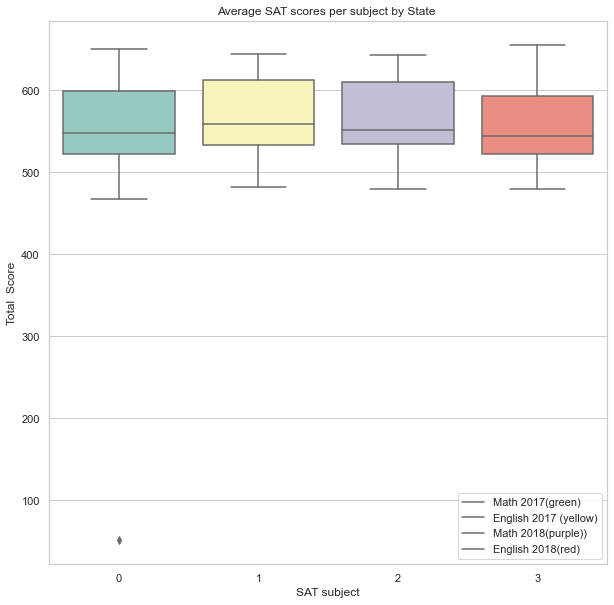

In [85]:
#** move legend to a corner

#For each numeric variable in the dataframe create a boxplot using Seaborn
sns.set_theme(style="whitegrid")
act = [final['math_2017_act'], final['english_2017_act'], final['reading_2017_act'], final['science_2017_act']]
SAT = [final['math_2017_sat'], final['writing_reading_2017_sat'], final['writing_reading_2018_sat'], final['math_2018_sat']]

y = range(1,30)

legend = ['Math 2017 ', 'Writing 2017', 'Math 2018', 'Writing 2018']
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = SAT, orient = 'v', palette="Set3")
ax.set_title('Average SAT scores per subject by State ')
ax.set_ylabel('Total  Score')
ax.set_xlabel('SAT subject')
handles, _ = ax.get_legend_handles_labels()
ax.legend(['Math 2017(green)', 'English 2017 (yellow)', 'Math 2018(purple))', 'English 2018(red)'])

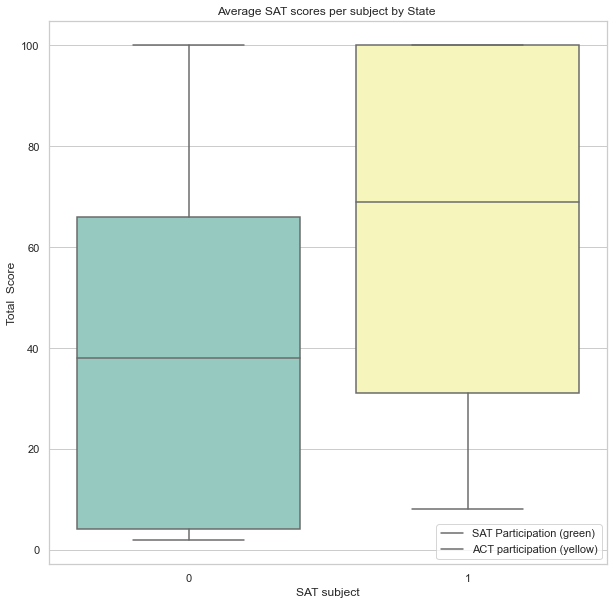

In [87]:
#For each numeric variable in the dataframe create a boxplot using Seaborn
sns.set_theme(style="whitegrid")
act = [final['math_2017_act'], final['english_2017_act'], final['reading_2017_act'], final['science_2017_act']]
SAT = [final['math_2017_sat'], final['writing_reading_2017_sat'], final['writing_reading_2018_sat'], final['math_2018_sat']]
Participation = [final['participation_2017_sat'], final['participation_2017_act']]
y = range(1,100)

legend = ['Math 2017 ', 'Writing 2017', 'Math 2018', 'Writing 2018']
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = Participation, orient = 'v', palette="Set3")
ax.set_title('Average SAT scores per subject by State ')
ax.set_ylabel('Total  Score')
ax.set_xlabel('SAT subject')
handles, _ = ax.get_legend_handles_labels()
ax.legend(['SAT Participation (green)', 'ACT participation (yellow)'])

## Outside Research

Based upon your observations, choose **one** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## I will focus solely on New Mexico for the rest of this project

### New Mexico 

Info source: http://www.act.org/content/dam/act/unsecured/documents/cccr-2019/New-Mexico-CCCR-2019.pdf

## Demographics New Mexico
- 48% of new mexios population is hispanic 
- 54% of hispanic students are taking the ACT, 
- This is below the state average participation of 66%

I will compare New Mexico scores to national avg 


In [88]:
final['composite_2018_act'].mean()

21.49607843137255

In [89]:
act_2019['composite_2019_act'].mean()

21.449999999999992

In [90]:
# Examining New Mexico's scores

final.loc[final['State'] == 'New Mexico']

,State,participation_2017_sat,writing_reading_2017_sat,math_2017_sat,total_2017_sat,participation_2017_act,english_2017_act,math_2017_act,reading_2017_act,science_2017_act,composite_2017_act,participation_2018_sat,writing_reading_2018_sat,math_2018_sat,total_2018_sat,participation_2018_act,composite_2018_act
31,New Mexico,11.0,577,561,1138,66.0,18.6,19.4,20.4,20.0,19.7,16.0,552,540,1093,67.0,19.4


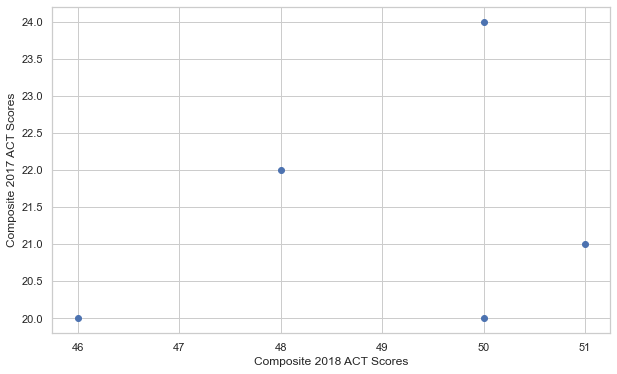

In [91]:
plt.figure(figsize = (10,6))
N = len(x)
x = [50,51,50,48,46]
y = [24,21,20,22,20]
plt.xlabel('Composite 2018 ACT Scores')
plt.ylabel('Composite 2017 ACT Scores')
ax.set_title('Average Composite 2017 and 2018 ACT scores by State')
colors = np.random.rand(N)
#area = N  # 0 to 15 point radii

plt.scatter(x, y)
plt.show()

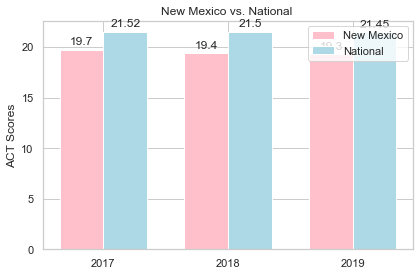

<Figure size 1008x1296 with 0 Axes>

In [93]:

labels = ['2017', '2018', '2019']
nm_score = [19.7, 19.4, 19.3]
nation_score = [21.52, 21.5, 21.45]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nm_score, width, label='New Mexico', color = 'pink')
rects2 = ax.bar(x + width/2, nation_score, width, label='National', color = 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ACT Scores')
ax.set_title('New Mexico vs. National ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.figure(figsize = (14,18))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

New Mexico mean ACT scores consistently lower than national avg score

No handles with labels found to put in legend.


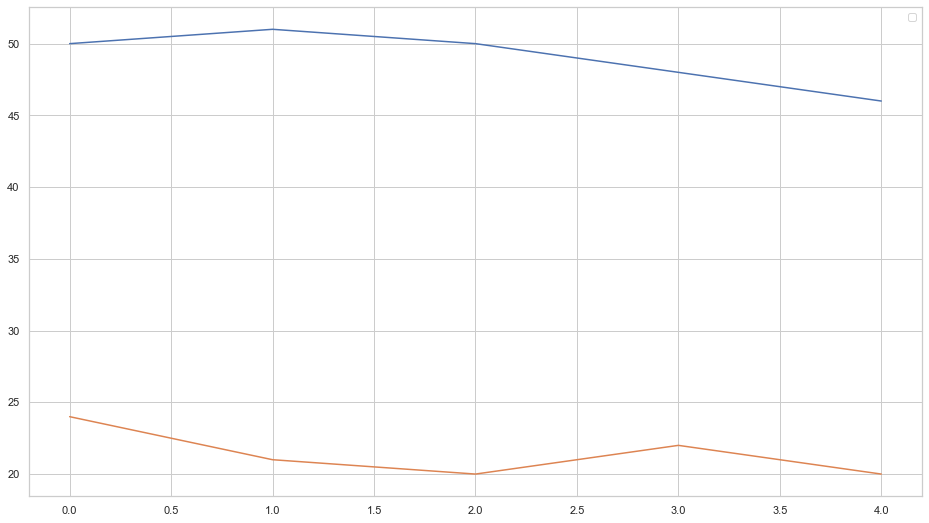

In [94]:
plt.figure(figsize=(16, 9))
x = [50,51,50,48,46]
y = [24,21,20,22,20]
# Create line plot of GOOG volume over time.
 
plt.plot(x)
# Create line plot of NKE volume over time.

plt.plot(y)

plt.legend(loc = 'upper right')

Blue line is white students, orange line is latino students. shows discrepency on scores on the ACT

In [96]:
nm = pd.read_csv('data/NMrates.csv')

nm

,year,Score,Race
0,2015,50,white
1,2016,51,white
2,2017,50,white
3,2018,48,white
4,2019,46,white
5,2015,21,latino
6,2016,24,latino
7,2017,20,latino
8,2018,22,latino
9,2019,20,latino


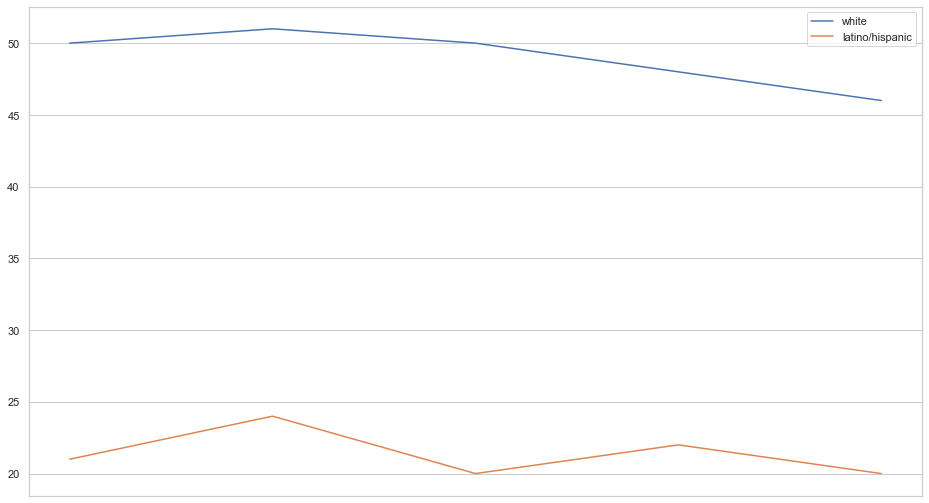

In [106]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.xlabel = ('Year')
# Create line ACT scores of white students over time.
 
plt.plot(nm[nm['Race'] == 'white']['year'],
         nm[nm['Race'] == 'white']['Score'],label = 'white')
# Create line plot of ACT scores of latino students over time

plt.plot(nm[nm['Race'] == 'latino']['year'],
         nm[nm['Race'] == 'latino']['Score'],label = 'latino/hispanic')


plt.legend(loc = 'upper right')

As you can see in the graph above the scores of white students are consistently higher than the scores of their latino counterparts 

In [102]:
nm['year'] = pd.to_datetime(nm['year'])

In [100]:
nm[nm['Race'] == 'white']['Score']

0    50
1    51
2    50
3    48
4    46
Name: Score, dtype: int64

(array([2014.5, 2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. ,
        2018.5, 2019. , 2019.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

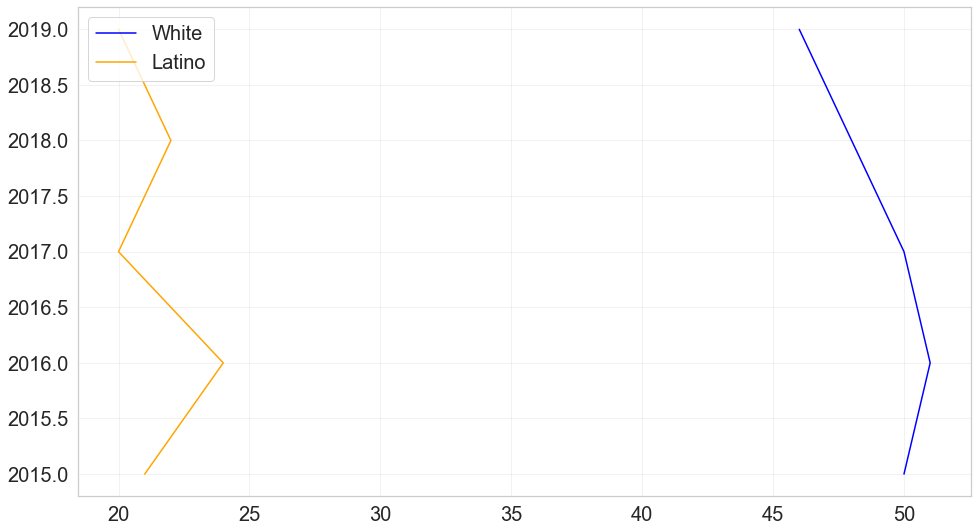

In [101]:
plt.figure(figsize=(16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(nm[nm['Race'] == 'white']['Score'], [2015,2016,2017,2018,2019],c = 'blue',label = 'White')

# Create line plot of SBUX closing price over time.
plt.plot(nm[nm['Race'] == 'latino']['Score'], [2015,2016,2017,2018,2019],c = 'orange',label = 'Latino')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
#plt.title("White students reach ACT benchmark at a much higher percentage than latino students .", fontsize = 30);

# Conclusions about increasing ACT Participation in New Mexico

Based on the data analysis, there are a few recommendations for the College Board.

It is a common phenomena in the US that states are either ACT dominated or SAT dominated. Because of this polarization It doesn’t make sense to try to get states like those on the  east coast which have contracts and mandates around the SAT to come around and implement the ACT. Our success rates would likely be very low because of the infrastructure in these states there to support the SAT, so I want to target swing states as we can call  them, that is states that are not extremely dominated by one or the other.  I’ve identified this as largely the mid west region 

To increase participation amongst our target population it’s import to understand barriers to participation. 
There are 27 million households in midwest, 60% of that are couples with children that will likely at some point be considering taking the ACT 
Many of those children will be hispanic and many of them will come from lower income backgrounds. 
Income impacts the ACT. 56,000 students fall in to one of the category of being  low-socio economic status, and having parents who did not attend college. We know that our target population has large non-white and lower socioeconomic demographics. Turns out, this has detrimental impacts on ACT outcomes. Only 9% of students which were non white, lower socioeconomic status, and had parents who didn’t attend college reached benchmark scores on the ACT. 

To see the impacts economic status and and ethnicity had on Act outcomes ,I wanted to target a state with  large numbers of non white and lower income demographics. 

This led me to New Mexico.

The biggest thing I discovered is that the ACT is not offered in spanish. 

As a result of this hispanic students are scoring significantly lower on the ACT than their white counterparts.
This could be a large reason that New Mexico’s average ACT score is significantly lower than the national Average ACT score.

Offering the ACT in Spanish and for free in new mexico will not only increase overall ACT participation, it’ll also increase average ACT test scores, better the outcomes of hispanic students admittance to college, and decrease cultural discrimination taking place on the ACT. 
